Nama : Muhamad Abdulah Ridwan
Kelas : Pagi C
nim : 221351084


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('konsumsi-bbm.csv')


In [12]:
df.head()


,Jarak_Tempuh,Konsumsi_BBM
0,5,1.8
1,10,3.1
2,15,4.5
3,20,6.3
4,25,7.1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Jarak_Tempuh  20 non-null     int64  
 1   Konsumsi_BBM  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


In [14]:
df.describe()

,Jarak_Tempuh,Konsumsi_BBM
count,20.000000,20.000000
mean,52.500000,13.715000
std,29.580399,7.143512
min,5.000000,1.800000
25%,28.750000,8.075000
50%,52.500000,13.950000
75%,76.250000,19.325000
max,100.000000,25.300000


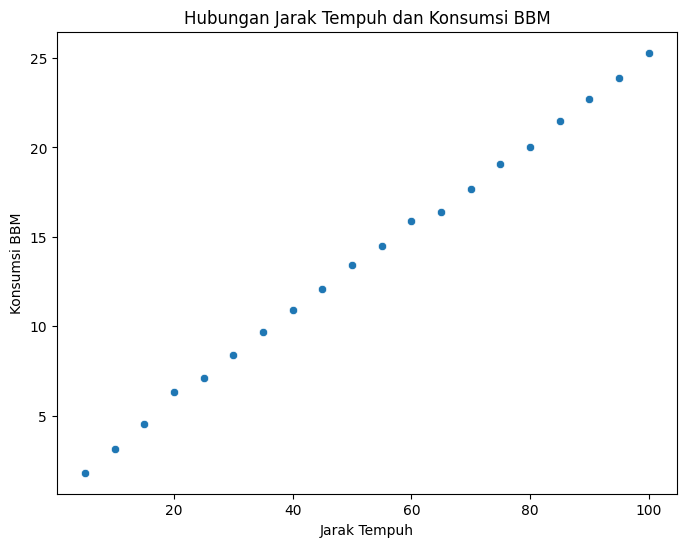

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Jarak_Tempuh', y='Konsumsi_BBM', data=df)
plt.title('Hubungan Jarak Tempuh dan Konsumsi BBM')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Konsumsi BBM')
plt.show()


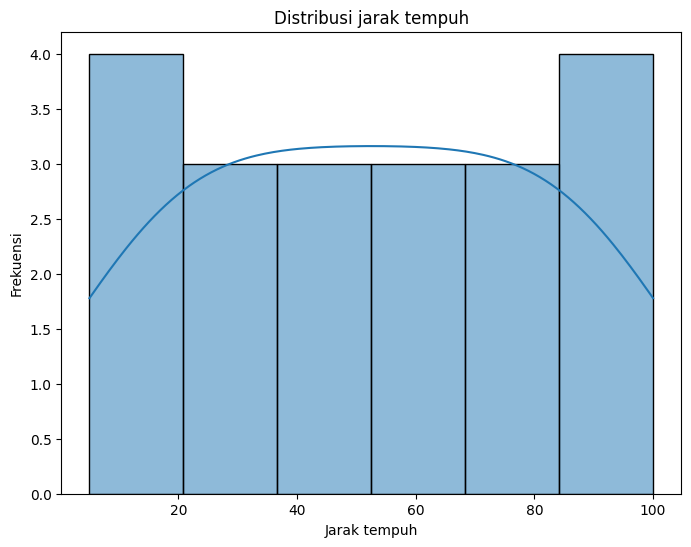

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Jarak_Tempuh'], kde=True)
plt.title('Distribusi jarak tempuh')
plt.xlabel('Jarak tempuh')
plt.ylabel('Frekuensi')
plt.show()



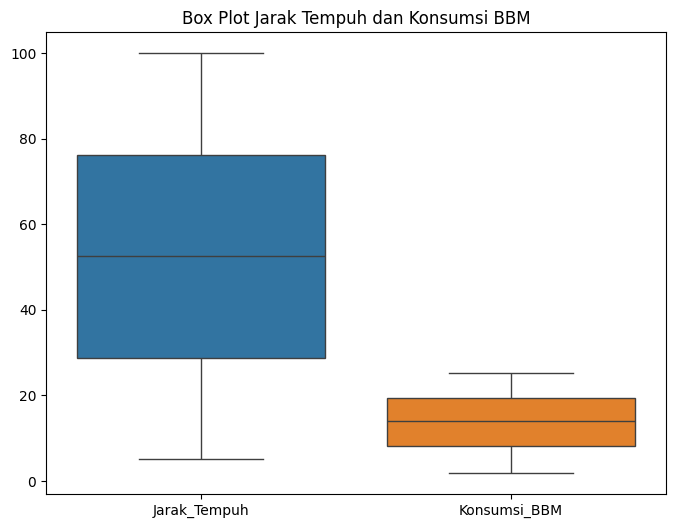

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Jarak_Tempuh', 'Konsumsi_BBM']])
plt.title('Box Plot Jarak Tempuh dan Konsumsi BBM')
plt.show()


In [18]:
X = df[['Jarak_Tempuh']]
y = df['Konsumsi_BBM']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LinearRegression()


In [21]:
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)


In [23]:
jarak_baru = [60, 70, 80] 
konsumsi_prediksi = model.predict([[jarak] for jarak in jarak_baru])


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
print('\nSimulasi Konsumsi BBM:')
for i in range(len(jarak_baru)):
    print(f'Jarak Tempuh: {jarak_baru[i]}, Konsumsi BBM Prediksi: {konsumsi_prediksi[i]}')



Simulasi Konsumsi BBM:
Jarak Tempuh: 60, Konsumsi BBM Prediksi: 15.586532951289398
Jarak Tempuh: 70, Konsumsi BBM Prediksi: 17.974377921882066
Jarak Tempuh: 80, Konsumsi BBM Prediksi: 20.362222892474737


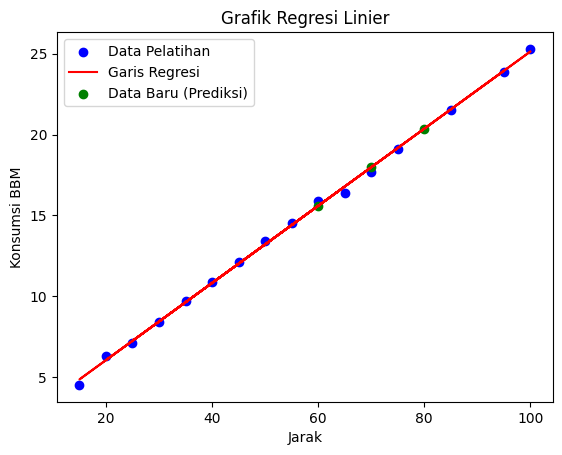

In [25]:
plt.scatter(X_train, y_train, color='blue', label='Data Pelatihan')
plt.plot(X_train, model.predict(X_train), color='red', label='Garis Regresi')
plt.scatter(jarak_baru, konsumsi_prediksi, color='green', label='Data Baru (Prediksi)')
plt.xlabel('Jarak')
plt.ylabel('Konsumsi BBM')
plt.title('Grafik Regresi Linier')
plt.legend()
plt.show()


In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [27]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.21504278213809458
R-squared (R2): 0.9976218658320366
